# QTM 151 Final Project

## Project Members:
* Joe Van Duyn
* Khushi Goyal
* Andy Wu
* Amber Lin

### In this project, we will answer three different questions about the data in the HRMI dataset, specifically the Economic and Social Rights (ESR) Data Sets, the, and the, (whatever datasets you guys used)

## **INSIGHT 1**

### How does the gender gap in the fulfillment of fundamental economic and social rights — including education, food, health, housing, and work — vary between low-income and high-income countries, and how has this gap evolved over time?

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

In [ ]:
esr_dis = pd.read_csv(io.BytesIO(uploaded['esr_sex_disaggregated (2).csv']))

#### We first create four barplots, two for the high income countries and two for the low income countries. We want to compare the gap between men and women's outlook in food and education for both high income and low income countries and compare them.

In [ ]:
# Define the indicators to analyze
indicators = ['HiY_Education', 'HiY_Food', 'LMY_Education', 'LMY_Food']

# Calculate gender gap columns in the full dataset first
for indicator in indicators:
    female_col = f"{indicator}_Female_IAScore"
    male_col = f"{indicator}_Male_IAScore"
    gap_col = f"{indicator}_GenderGap_IAScore"

    esr_dis[gap_col] = esr_dis[female_col] - esr_dis[male_col]

# Filter for 2021 high-income country data
esr_dis_hi = esr_dis[(esr_dis['High_Income_Country'] == 1) & (esr_dis['Year'] == 2021)].copy()

# Store results
gap_results = {}

for indicator in indicators:
    gap_col = f"{indicator}_GenderGap_IAScore"

    df_gap = esr_dis_hi.dropna(subset=[gap_col]).copy()
    df_gap['Average_GenderGap_IA'] = df_gap[gap_col]

    df_sorted = df_gap.sort_values('Average_GenderGap_IA')
    bottom10 = df_sorted.head(10)
    top10 = df_sorted.tail(10)

    gap_results[indicator] = pd.concat([bottom10, top10])

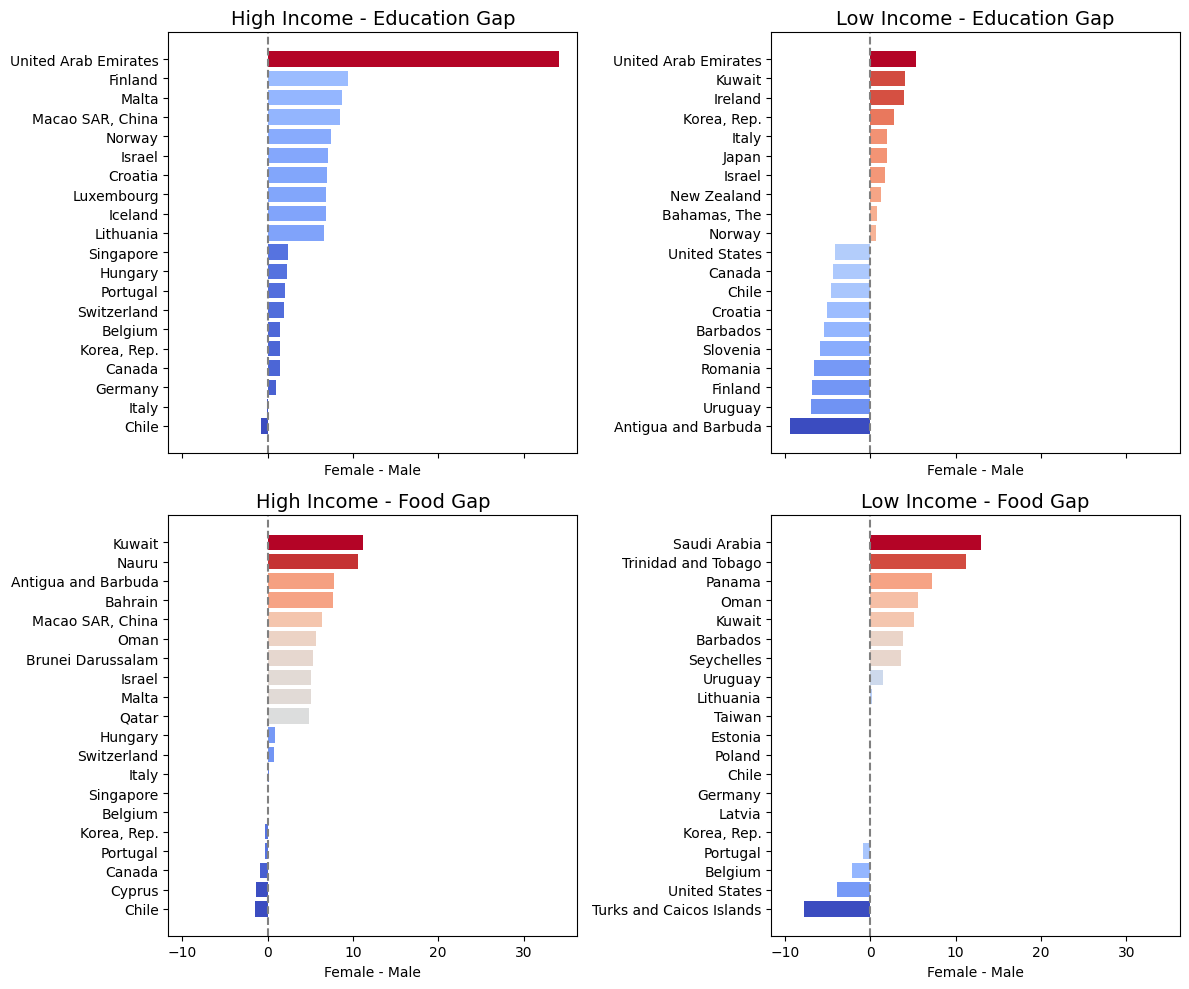

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True)
axes = axes.flatten()

# Define datasets and titles
datasets = [
    (gap_results['HiY_Education'], 'High Income - Education Gap'),
    (gap_results['HiY_Food'], 'Low Income - Education Gap'),
    (gap_results['LMY_Education'], 'High Income - Food Gap'),
    (gap_results['LMY_Food'], 'Low Income - Food Gap')
]

# Plot each dataset
for ax, (data, title) in zip(axes, datasets):
    countries = data['Country']
    values = data['Average_GenderGap_IA']
    ax.barh(countries, values, color=plt.cm.coolwarm((values - values.min()) / (values.max() - values.min())))
    ax.axvline(0, color='gray', linestyle='--')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Female - Male")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

#### Gender Gaps in Right to Education and Right to Food (IA Scores) -- High-Income Countries
* The bar plots display the top 10 and bottom 10 high-income countries in terms of the gender gap in income-adjusted scored for right to education and right to food in 2021.
* A bar to the right of the zero line indicates that females have a higher IA score than males for that right in a given country.
* Most high-income countries in both plots show positive gender gaps, suggesting that females tend to outperform males in both education and food rights in these countries.
* This trend is consistent among the top 10 and even appears in the bottom 10, where the gender gap is often still in favor of females.

#### Gender Gaps in Right to Education and Right to Food (IA Scores) -- Low-Income Countries
* The bar plots display the top 10 and bottom 10 low-income countries in terms of the gender gap in income-adjusted score for the right to education and right to food in 2021.
* In contrast to high-income countries, the gender gap is more variable in low-income contexts, where the top 10 countries exhibit a positive gender gap, and the bottom 10 countries show negative or minimal gaps.

#### This variation highlights greater disparities and inconsistencies in gender equality across low-income countries than in high-income countries. Progress may be influenced by differing policy environments, cultural factors, or structural barriers.

#### We now want to see if this was true in prior years. We will add our computed gender gaps to the original dataframe, then plot them over time.

In [ ]:
# Define a dictionary mapping labels to tuples
ia_score_columns = {
    'Education_LMY': ('LMY_Education_Female_IAScore', 'LMY_Education_Male_IAScore'),
    'Education_HiY': ('HiY_Education_Female_IAScore', 'HiY_Education_Male_IAScore'),
    'Food_LMY': ('LMY_Food_Female_IAScore', 'LMY_Food_Male_IAScore'),
    'Food_HiY': ('HiY_Food_Female_IAScore', 'HiY_Food_Male_IAScore')}

# Calculate gender gap for each indicator
for label, (female_col, male_col) in ia_score_columns.items():
    gap_col = f'GenderGap_{label}'
    esr_dis[gap_col] = esr_dis[female_col] - esr_dis[male_col]

# Create a list of all gender gap columns
gap_cols = [f'GenderGap_{label}' for label in ia_score_columns]
esr_dis = esr_dis.dropna(subset=gap_cols, how='all')

# Compute average gender gap
esr_dis['Average_GenderGap_IA'] = esr_dis[gap_cols].mean(axis=1)

# Sort the full dataset by the average gender gap
esr_sorted = esr_dis.sort_values('Average_GenderGap_IA')
gap_by_year = esr_dis.dropna(subset=['Average_GenderGap_IA'])
avg_gap_by_year = (
    gap_by_year.groupby(['Year', 'High_Income_Country'])['Average_GenderGap_IA']
    .mean()
    .reset_index())

<ipython-input-33-e54a1ddbc182>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esr_dis['Average_GenderGap_IA'] = esr_dis[gap_cols].mean(axis=1)


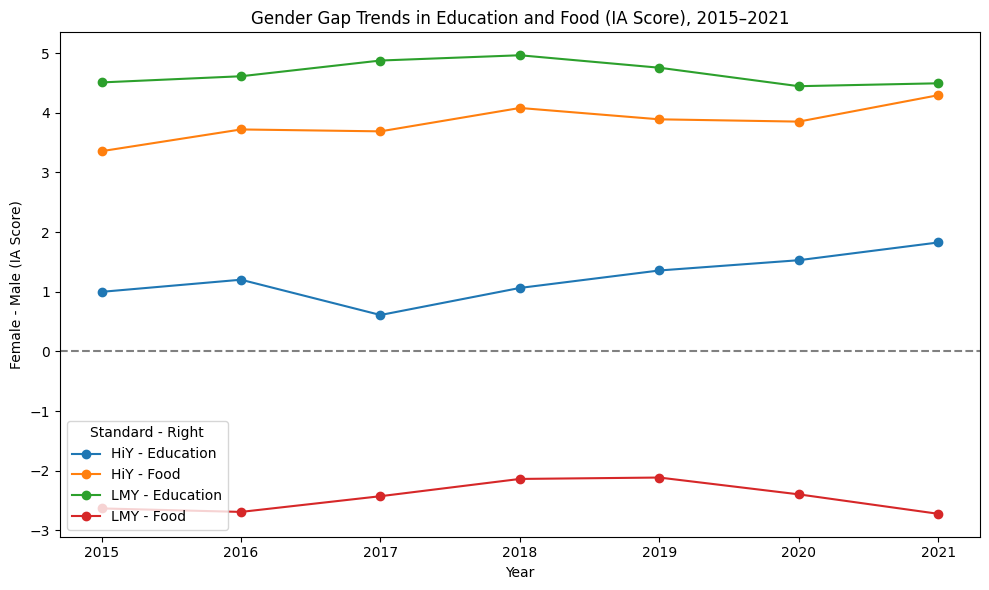

In [ ]:
# Filter relevant years
plot_df = esr_dis[(esr_dis['Year'] >= 2015) & (esr_dis['Year'] <= 2021)]

# Group by year and calculate mean for each indicator
summary = plot_df.groupby('Year').agg({
    'GenderGap_Education_LMY': 'mean',
    'GenderGap_Education_HiY': 'mean',
    'GenderGap_Food_LMY': 'mean',
    'GenderGap_Food_HiY': 'mean'
}).reset_index()

# Plot
plt.figure(figsize=(10, 6))

plt.plot(summary['Year'], summary['GenderGap_Education_LMY'], label='HiY - Education', marker='o')
plt.plot(summary['Year'], summary['GenderGap_Education_HiY'], label='HiY - Food', marker='o')
plt.plot(summary['Year'], summary['GenderGap_Food_LMY'], label='LMY - Education', marker='o')
plt.plot(summary['Year'], summary['GenderGap_Food_HiY'], label='LMY - Food', marker='o')

plt.axhline(0, color='gray', linestyle='--')

plt.title("Gender Gap Trends in Education and Food (IA Score), 2015–2021")
plt.ylabel("Female - Male (IA Score)")
plt.xlabel("Year")
plt.legend(title="Standard - Right")
plt.tight_layout()
plt.show()

### Gender Gap Trends in Education and Food, 2015-2021

* Scores in both categories in both education and food categories showed consistent trends across the years, with no significant shifts for high-income or low-income countries.
* Low income countries' income adjusted right to education favored females most out of all four metrics, followed by high income countries' right to food and high income countries' right to education, which also favored females.
* Low income countries' income adjusted right to food was the only metrics that favored males over females.

### The female advantage in education in low-income countries suggests that efforts to improve educational access for women are yielding positive results, but there may still be gender disparities in other areas like food security.

### Finally, we want to analyze how individual rights changed over time, going more into depth by looking at stats like food security and adult survival. We need to parse the dataset names and compute gender gaps for each right.

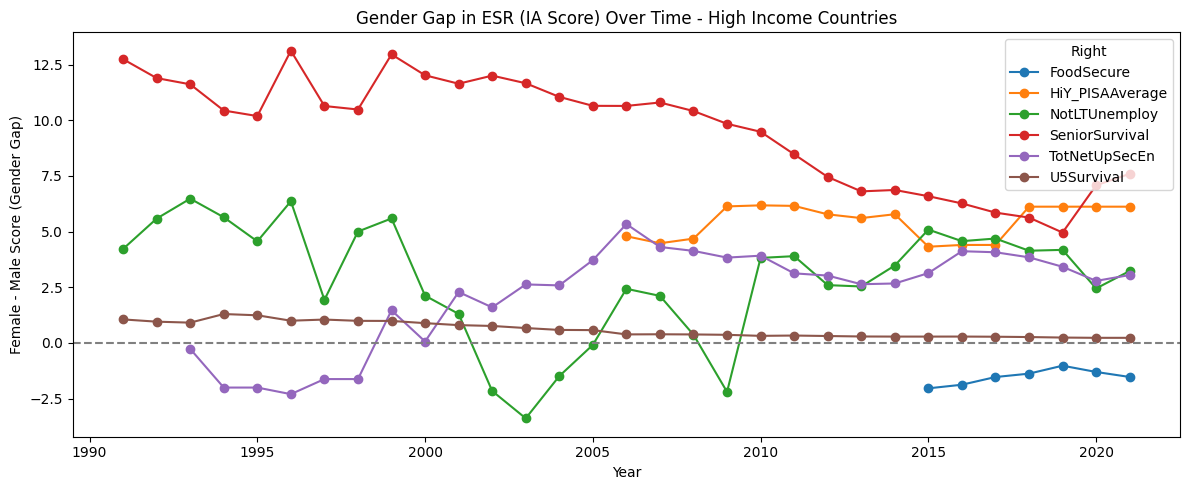

In [ ]:
# Indicators to keep
keep_high = {
    "HiY_PISAAverage", "SeniorSurvival", "U5Survival",
    "NotLTUnemploy", "FoodSecure", "TotNetUpSecEn"
}
keep_low = {
    "AdultSurvival", "H_EducQual", "NotStunted",
    "TotNetPrimEn", "TotNetUpSecEn",
    "U5Survival"
}

keep_indicators = keep_high.union(keep_low)

# Compute gender gaps for selected indicators
for indicator in keep_indicators:
    f_col, m_col = f"{indicator}_Female_IAScore", f"{indicator}_Male_IAScore"
    if f_col in esr_dis.columns and m_col in esr_dis.columns:
        esr_dis[f"{indicator}_GenderGap"] = esr_dis[f_col] - esr_dis[m_col]

# Collect gender gap data
gap_df = pd.concat([
    esr_dis[['Year', 'High_Income_Country', f"{ind}_GenderGap"]]
    .dropna(subset=[f"{ind}_GenderGap"])
    .groupby(['Year', 'High_Income_Country'])[f"{ind}_GenderGap"]
    .mean()
    .reset_index()
    .rename(columns={f"{ind}_GenderGap": "Avg_GenderGap"})
    .assign(Right=ind)
    for ind in keep_indicators
        if f"{ind}_GenderGap" in esr_dis.columns], ignore_index=True)

# Filter for high-income countries and plot
gap_high = gap_df[(gap_df['High_Income_Country'] == 1) & (gap_df['Right'].isin(keep_high))]

plt.figure(figsize=(12, 5))
gap_high.pivot(index='Year', columns='Right', values='Avg_GenderGap').plot(marker='o', ax=plt.gca())
plt.axhline(0, color='gray', linestyle='--')
plt.title("Gender Gap in ESR (IA Score) Over Time - High Income Countries")
plt.xlabel("Year")
plt.ylabel("Female - Male Score (Gender Gap)")
plt.legend(title="Right")
plt.tight_layout()
plt.show()

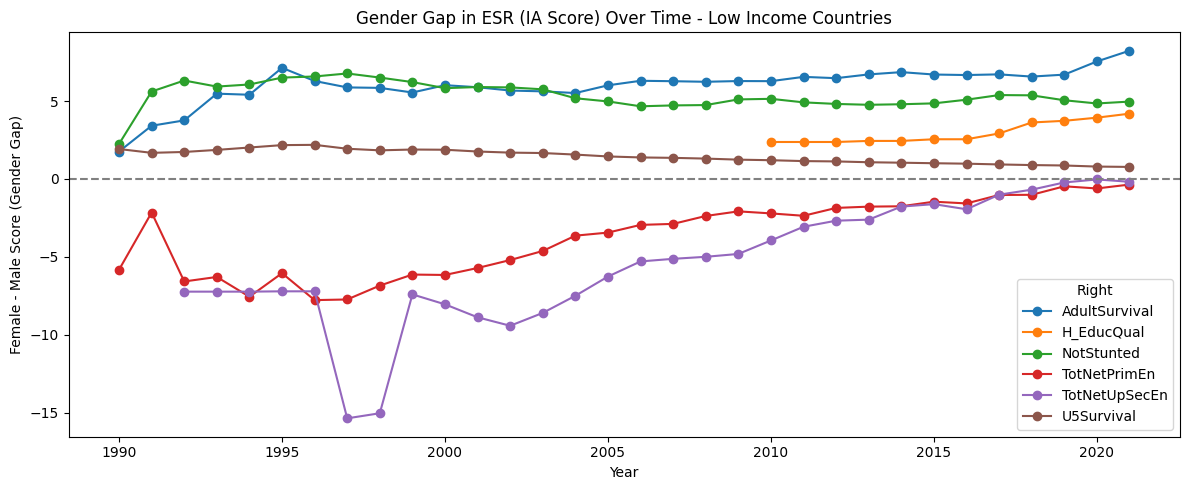

In [ ]:
gap_low = gap_df[(gap_df['High_Income_Country'] == 0) & (gap_df['Right'].isin(keep_low))]

plt.figure(figsize=(12, 5))
gap_low.pivot(index='Year', columns='Right', values='Avg_GenderGap').plot(marker='o', ax=plt.gca())
plt.axhline(0, color='gray', linestyle='--')
plt.title("Gender Gap in ESR (IA Score) Over Time - Low Income Countries")
plt.xlabel("Year")
plt.ylabel("Female - Male Score (Gender Gap)")
plt.legend(title="Right")
plt.tight_layout()
plt.show()

### Gender Gap in Rights (IA Score) Over Time - High Income Countries
* Over the past three decades, the gender gap in senior survival has steadily narrowed in high-income countries, shifting to favor males.
* Most rights in high-income countries continue to favor females, with the exception of food security, where males have higher scores.

### Gender Gap in Rights (IA Score) Over Time - High Income Countries
* Over time, women have gained more advocacy in primary and secondary education, reflected by a decreasing gender gap in this right.
* Other rights have stayed consistent. with adult survival, harmonized education scores, and child survival generally favoring females.

### High-income countries show a steady increase in gender equity, particularly in education, with females increasingly benefiting in areas such as primary and secondary education, while other rights such as adult survival and child survival remain consistently favorable to females. Food security remains an exception, where males tend to have a slight advantage.

##Insight3: How does the gender gap in the fulfillment of economic and social rights differ between high-income and low/mid-income countries

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving esr_sex_disaggregated.csv to esr_sex_disaggregated.csv


Graph 1: Gender Gap by Right and Income Group
This graph visualizes the average gender gap (Male − Female) in core economic and social rights — such as education, food, primary school access, under-5 survival, and employment — comparing high-income countries to low/mid-income countries.

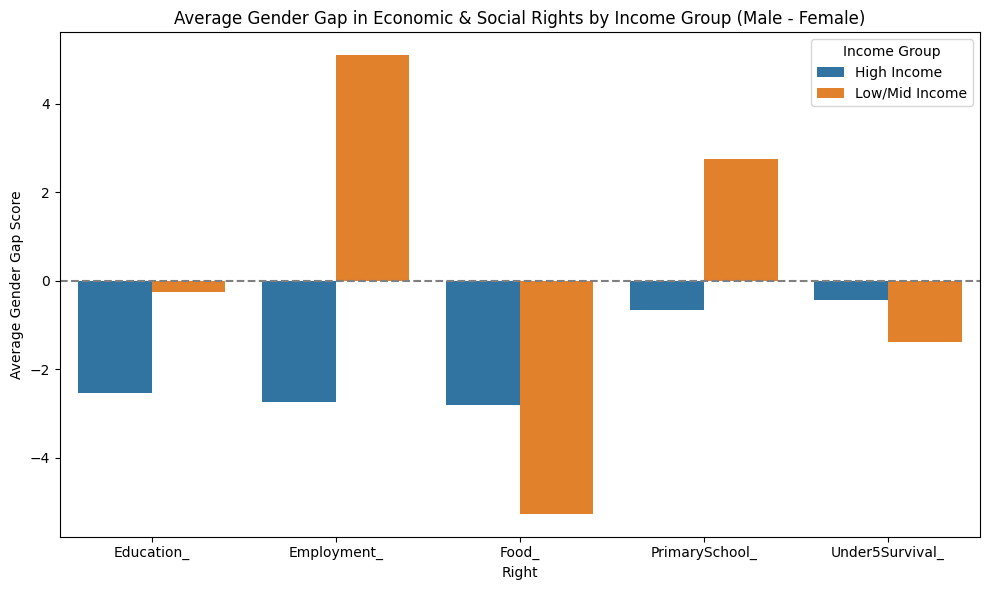

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("esr_sex_disaggregated.csv")

# Define indicators for analysis
indicators = [
    ('LMY_Education_Male_IAScore', 'LMY_Education_Female_IAScore'),
    ('LMY_Food_Male_IAScore', 'LMY_Food_Female_IAScore'),
    ('TotNetPrimEn_Male_IAScore', 'TotNetPrimEn_Female_IAScore'),
    ('U5Survival_Male_IAScore', 'U5Survival_Female_IAScore'),
    ('NotLTUnemploy_Male_IAScore', 'NotLTUnemploy_Female_IAScore')
]

# Calculate gender gaps
for male_col, female_col in indicators:
    gap_col = male_col.replace("Male", "GenderGap").replace("_IAScore", "")
    df[gap_col] = df[male_col] - df[female_col]

# Prepare data for plotting
gap_cols = [col for col in df.columns if "GenderGap" in col]
df_gap = df[['Country', 'Year', 'High_Income_Country'] + gap_cols].dropna(subset=gap_cols, how='all')
df_long = df_gap.melt(
    id_vars=['Country', 'Year', 'High_Income_Country'],
    value_vars=gap_cols,
    var_name='Right',
    value_name='GenderGap'
)

# Clean 'Right' names
df_long['Right'] = df_long['Right']\
    .str.replace("LMY_", "")\
    .str.replace("TotNetPrimEn_", "PrimarySchool_")\
    .str.replace("U5Survival_", "Under5Survival_")\
    .str.replace("NotLTUnemploy_", "Employment_")\
    .str.replace("GenderGap", "")

# Map income group labels
df_long['Income Group'] = df_long['High_Income_Country'].map({1: 'High Income', 0: 'Low/Mid Income'})

# Group and plot
avg_gap = df_long.groupby(['Income Group', 'Right'])['GenderGap'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_gap, x='Right', y='GenderGap', hue='Income Group')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Average Gender Gap in Economic & Social Rights by Income Group (Male - Female)")
plt.xlabel("Right")
plt.ylabel("Average Gender Gap Score")
plt.legend(title='Income Group')
plt.tight_layout()
plt.show()


Low/mid-income countries exhibit larger and more inconsistent gender gaps across rights. In some domains (e.g., education or food security), females face a notable disadvantage. In contrast, high-income countries tend to show more balanced or slightly male-biased scores, indicating more equitable fulfillment of these rights.

Graph 2: Gender Gap Over Time by Income Group
This time series tracks the average gender gap score across years, stratified by income level.

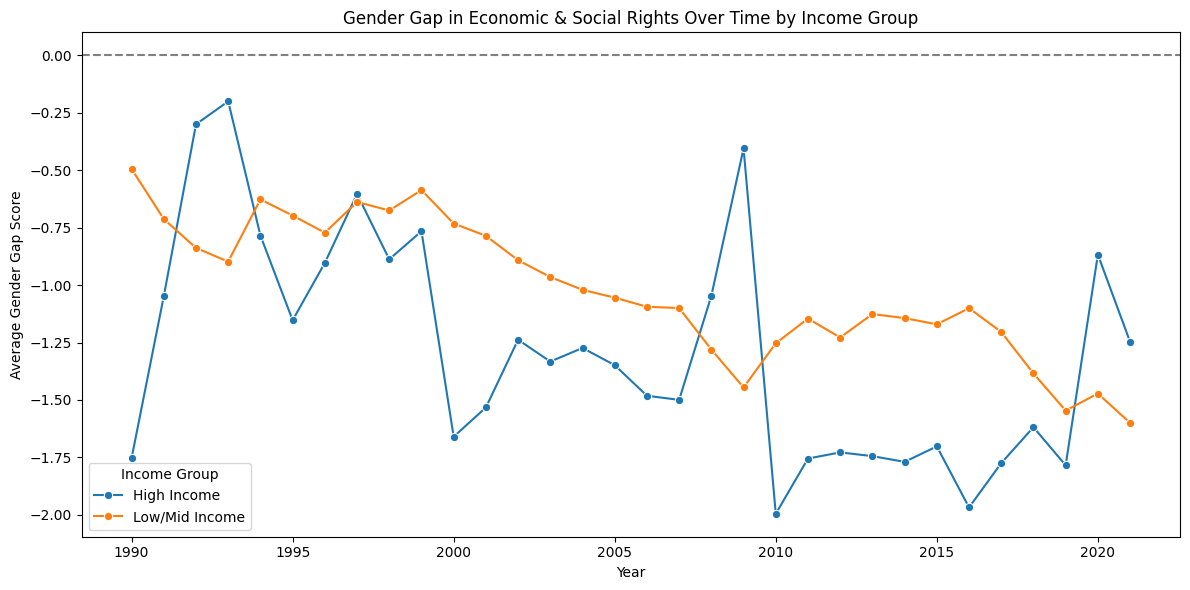

In [ ]:
# Calculate average gender gap over time by income group
time_gap = df_long.groupby(['Year', 'Income Group'])['GenderGap'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_gap, x='Year', y='GenderGap', hue='Income Group', marker='o')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Gender Gap in Economic & Social Rights Over Time by Income Group")
plt.xlabel("Year")
plt.ylabel("Average Gender Gap Score")
plt.legend(title='Income Group')
plt.tight_layout()
plt.show()


While both income groups show mild improvement over time, low/mid-income countries have persistent and wider gender gaps. High-income countries demonstrate a relatively stable, narrower gap, suggesting better institutional support and social progress in rights fulfillment for women.

Graph 3: Gender Gap by Region
This chart shows the average gender gap across global regions.

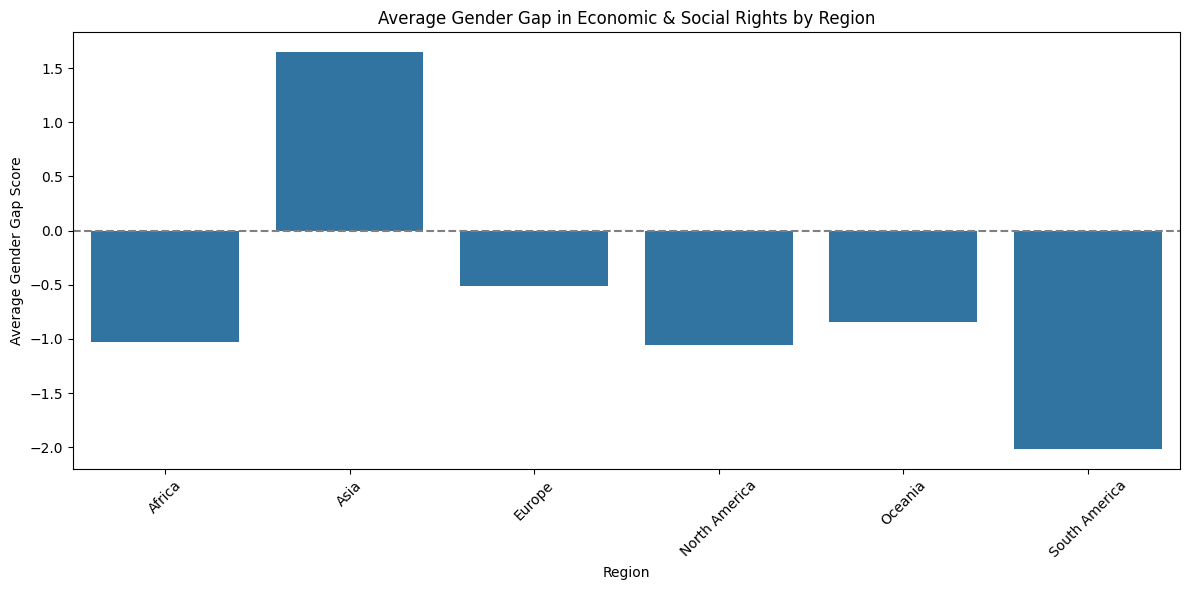

In [ ]:
# Assuming 'Region' column exists in your dataset
# If not, you may need to map countries to regions manually
# Create region mapping dictionary
region_map = {
    'United States': 'North America',
    'Canada': 'North America',
    'Germany': 'Europe',
    'France': 'Europe',
    'India': 'Asia',
    'China': 'Asia',
    'Brazil': 'South America',
    'South Africa': 'Africa',
    'Nigeria': 'Africa',
    'Australia': 'Oceania',
    # Add more countries as needed
}

# Apply to df_long
df_long['Region'] = df_long['Country'].map(region_map)

# Drop rows where region is still missing
df_long = df_long.dropna(subset=['Region'])

# Group by region
region_gap = df_long.groupby('Region')['GenderGap'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=region_gap, x='Region', y='GenderGap')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Average Gender Gap in Economic & Social Rights by Region")
plt.xlabel("Region")
plt.ylabel("Average Gender Gap Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Gender gaps are most pronounced in Sub-Saharan Africa and South Asia, where structural and economic challenges amplify inequality in access to rights. Conversely, Europe and North America exhibit the smallest gender gaps — in some cases favoring women slightly, especially in health-related scores.

#Insight 3 Final Conclusion
Across all analyses, it is evident that income level and regional context are significant factors influencing gender equality in economic and social rights. Countries with lower income or those in developing regions face wider and more variable gender gaps, reflecting deeper systemic inequalities. These findings underscore the importance of targeted interventions and global policy frameworks that prioritize gender equity, especially in education, health, and employment access for women in the Global South.